In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import grid_search
from sklearn import cross_validation
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from IPython.display import display
from IPython.core.pylabtools import getfigs

sns.set_context('talk')
sns.set_style('whitegrid') 


In [2]:
%matplotlib qt

In [3]:
def plotROCCurve(y_test, prediction_proba):
    fig = plt.figure(figsize=(4,4))
    fpr, tpr, thresholds = roc_curve(y_test, prediction_proba[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(bbox_to_anchor=(0.9, 0.2),
               bbox_transform=plt.gcf().transFigure)
    plt.savefig('random_forest_aucroc.png', bbox_inches='tight', dpi=200)

In [4]:
X_df = pd.read_pickle('new_X_df.save')
outcomes_df = pd.read_pickle('new_outcomes_df.save')

In [5]:
np.shape(X_df)

(115196, 38)

In [6]:
print list(X_df.columns)

['Goal', 'Campaign_days', 'Title_n_words', 'Blurb_n_words', 'Has_video', 'N_rewards', 'Min_reward', 'Median_reward', 'Max_reward', 'Reward_ship_days', 'N_links', 'N_figs', 'Body_n_words', 'N_creator_backed', 'N_creator_created', 'art', 'comics', 'crafts', 'dance', 'design', 'fashion', 'film', 'food', 'games', 'journalism', 'music', 'photography', 'publishing', 'technology', 'theater', 'Ships_intn', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


In [66]:
pred_subset_smaller = ['N_creator_backed',]

In [76]:
X_subset_df = X_df[pred_subset_smaller]

In [77]:
X_subset_df.head()

,N_creator_backed
0,18
1,7
2,3
3,8
4,0


In [78]:
X_train, X_test, y_train, y_test = \
    cross_validation.train_test_split(X_subset_df, outcomes_df['Outcome'].values, \
                                      test_size=0.25, random_state=2) # was 0

In [79]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=400)
clf.fit(X_train,y_train)
y_1 = clf.predict(X_test)

In [80]:
y_1_proba = clf.predict_proba(X_test)

In [81]:
metrics.roc_auc_score(y_test, y_1_proba[:,1]) # average='macro',

0.7038804101229631

In [82]:
metrics.accuracy_score(y_test,y_1, normalize=True)

0.67533594916490158

In [83]:
metrics.precision_recall_fscore_support(y_test, y_1)

(array([ 0.69789043,  0.63122242]),
 array([ 0.78729576,  0.5165029 ]),
 array([ 0.73990208,  0.56812933]),
 array([16892, 11907]))

In [84]:
print metrics.classification_report(y_test, y_1)

             precision    recall  f1-score   support

          0       0.70      0.79      0.74     16892
          1       0.63      0.52      0.57     11907

avg / total       0.67      0.68      0.67     28799



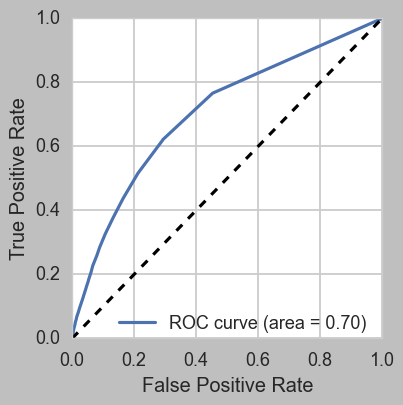

In [85]:
plotROCCurve(y_test, y_1_proba)
display(plt.gcf())

In [86]:
from plot_suggestions import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


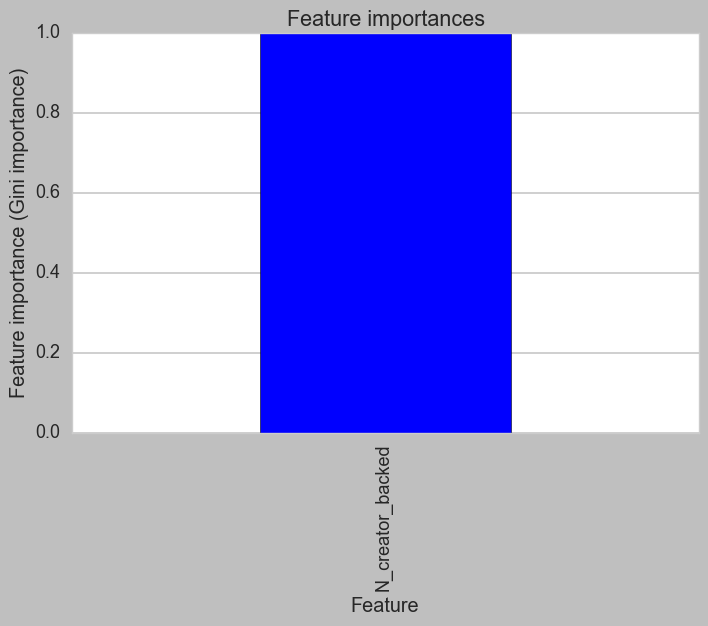

In [87]:
plot_feature_importances(clf.feature_importances_,\
                         X_subset_df.columns,n_top=len(X_subset_df.columns))
display(plt.gcf())